In [28]:
import pandas as pd
import numpy as np

import pickle
from pprint import pprint
from tqdm.notebook import tqdm

In [33]:
# pickle 불러오기
with open('./data/jeju_place_top47.pkl', 'rb') as f:
    df = pickle.load(f)
    
df.head()

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place_google
0,2020-01-01 01:15:00,"2019 제주여행 3 :: 성산일출봉, 풍미 독서, 세화해수욕장, 모이소",2박 3일 제주여행의 마지막 날 아침\n성산 일출봉을 향했다.입장 시간이 이미 해가...,https://blog.naver.com/chersy/221755888807,박 일 제주여행의 마지막 날 아침 성산 일출봉을 향했다.입장 시간이 이미 해가 ...,"[제주, 여행의, 마지막, 아침, 성산, 일출봉을, 향했다., 입장, 시간, 이미,...",[성산일출봉]
1,2020-01-01 02:03:00,[제주여행] 김포공항& 제주함덕해수욕장 &제주 무거버거♡,안녕하세요ㅎ\n바나나맛우유입니다ㅎㅎ\n앞전에 호텔사진 보고 오신분은\n알겠지만ㅋㅋㅋ...,https://blog.naver.com/rnjsrn001/221755913575,안녕하세요 바나나맛우유입니다 앞전에 호텔사진 보고 오신분은 알겠지만 네 ...,"[안녕하세요, 바나나맛우유, 입니다, 앞전에, 호텔, 사진, 보고, 오신분은, 알겠...",[함덕해수욕장]
2,2020-01-01 05:33:00,2019 돌아보며(ft.제주 여행 교훈),1. 부지런해져라. \n-일찍 자고 일찍 일어나기 (10-04)\n-생각한 대로 살...,https://blog.naver.com/umyumybabies/221755987867,. 부지런해져라. 일찍 자고 일찍 일어나기 생각한 대로 살자....,"[부지런, 해져라., 일찍, 자고, 일찍, 일어나, 생각, 대로, 살자., 살아가는...",[비양도]
3,2020-01-01 10:46:00,"제주여행 3일차(용두암,전복성게미역국, 선물고팡,제주공항)",올것이 왔습니다. 제주에서의 마지막 날입니다.\n너무 아쉽습니다.\n혼자여행 외롭거...,https://blog.naver.com/deuxsun0915/221756111749,올것이 왔습니다. 제주에서의 마지막 날입니다. 너무 아쉽습니다. 혼자여행 외롭거나 ...,"[올것이, 왔습니다., 제주, 에서의, 마지막, 날입니다., 너무, 아쉽습니다., ...",[용두암]
4,2020-01-01 10:51:00,2019.12.31. 제주여행 2일차(먹고자고),오늘은 넘나 심플한 하루였다. 늦잠자고 점심먹고 스벅갔다가 저녁먹고 끝!원래는 10...,https://blog.naver.com/hongnal0127/221756115426,오늘은 넘나 심플한 하루였다. 늦잠자고 점심먹고 스벅갔다가 저녁먹고 끝 원래는 ...,"[오늘은, 넘나, 심플한, 하루였다., 늦잠자고, 점심, 먹고, 스벅갔다가, 저녁,...",[한라산]


In [34]:
df.shape

(29795, 7)

## Filtering by date

In [35]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.shape

(29795, 7)

In [36]:
df_filtered = df.loc[df["날짜"].between('2021-01-01', '2021-06-30')]
df_filtered.shape

(8732, 7)

In [37]:
df_filtered = df_filtered.dropna()
df_filtered.shape

(8732, 7)

## Split by places

In [38]:
df_filtered.head(2)

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place_google
14003,2021-01-01 03:32:00,제주 오름 추천 ㅣ 금오름 소요시간 ♥,미니 백록담이라고도 불리는 제주 금오름 ☻ \n보통 언덕인 제주 오름들과는 다르게 ...,https://blog.naver.com/jinmichu/222192225676,미니 백록담이라고도 불리는 제주 금오름 보통 언덕인 제주 오름들과는 다르게 ...,"[미니, 백록담, 이라고도, 불리는, 제주, 금오름, 보통, 언덕, 제주, 오름들과...",[한라산]
14004,2021-01-01 07:03:00,2021 새해 첫 해외여행은 미국 서부로!,"""해가 밝았으니 여행을 떠나자!""\n신축년 새해는 소처럼 우직하니 해외여행\n첫 스...",https://blog.naver.com/l6014417/222192276207,해가 밝았으니 여행을 떠나자 신축년 새해는 소처럼 우직하니 해외여행 첫 스타트...,"[해가, 밝았, 으니, 여행, 떠나, 신축년, 새해는, 소처럼, 우직하니, 해외여행...",[성산일출봉]


In [39]:
type(df_filtered['jeju_place_google'].iloc[0])

list

In [40]:
pprint(df_filtered.iloc[1].jeju_place_google)

['성산일출봉']


In [41]:
import re

s_idx=0
result_list = []
for idx, row in tqdm(df_filtered.iterrows()):
    jeju_place_google = row['jeju_place_google']
#     print(len(jeju_place_google))
    if len(jeju_place_google) == 1:
        result_list.append([row['날짜'], row['text_prep'], row['jeju_place_google'], idx])
        continue
    sents = re.split(r'[.!?]', row['text_prep'])
    target_place = jeju_place_google[0]
    for sent_idx, s in enumerate(sents):        
        if target_place in s:
            s_idx = sent_idx
        for place in jeju_place_google:
            if (target_place != place) & (place in s):
#                 print(target_place)
#                 print(s_idx, sent_idx)
#                 print("".join(sents[s_idx:sent_idx+1]))
                result_list.append([row['날짜'], "".join(sents[s_idx:sent_idx+1]), target_place, idx])
                target_place = place
                s_idx = sent_idx

result_list.append([row['날짜'], "".join(sents[s_idx:]), target_place, idx])

0it [00:00, ?it/s]

In [42]:
splited_data = pd.DataFrame(result_list, columns=["date", 'text', 'place', 'idx'])

In [43]:
splited_data['place'] = splited_data['place'].apply(lambda x: "".join(x) if type(x)==list else x)

In [94]:
splited_data.isnull().sum()

date     0
text     0
place    0
idx      0
dtype: int64

In [53]:
splited_data['text'][5]

' 색달해수욕장 우리의 첫 여행지다.해변을 걸었다. 미국 씰비치에서 여름에 놀던 기억도 나고  밑에서 위를 올려다보니 더 걷기 좋아보여서 장소를 옮겼다.눈에 정신이 팔려 작은 눈사람을 만들다 보조를 맞추기위해 포기하고 올라가는 중이다  위엔 더 멋진 풍경과  더 많은 눈들이 나를 기다리고 있었고  올라프를 생각하며 미국식 눈사람을 만들었다. 혹시나 싶어 준비한 라텍스 고무장갑 정말 유용하게 사용했다   늘 내 마음 속에 사랑과 고마움으로 가득찬 친구들에게 보내는 내마음을 담은 눈사람으로 사랑을 보냈다   다음장소는  대포주상절리 코로나로 출입을 금지해서 매표를 하고 입장하는 곳은 갈 수 없었는데 주변 산책만으로도 충분히 멋지고 좋았다.동백꽃이 예쁘다  우리 모자랑 깔맞춤 된 조개조형물   여긴 아프리카박물관고릴라 두마리고릴라 세마리  내가 좋아하는 해바라기 뒤에 멀리 보이는 코끼리와 사자 조형물이 사파리에 와 있는 느낌이 들도록 찍은 사진인데   겨울이라 눈과 복장에 꿈깬 사진   장보기도 쉽게 홍당무들고 지나가던 아주머니 덕에 발견한  필요한 식수는 필수 쌀도 필수 늘 밥상을 받고 살아서  여기선 내가 주도적으로 상차리기를 하겠다 했다. 누룽지밥은 시원한 숭늉은 따봉인데 밥심 필요한 내게는 힘이 딸려 쌀을 샀다   하멜상선전시관 근처 전경제주도 외국인들이 살고싶은 한국  위 분위기로 알 것 같은 마음 용머리해안 마주보이는 산 멋진데 가짜 아우라 어깨에 매고 있는 부처가 자연스런 분위기 망쳤다는 느낌  여기저기 코로나 마스크여기도 코로나로 출입금지 지역  하멜씨 눈 비 맞으며 한국와서 계속 고생중  봄에 이모와 함께 왔던  송악산사진 부탁하고 이모와 통화했다   늘 고맙고 좋아하고 존경하는 이모  집으로 들어와 맛있는 저녁 준비했다  마트에서 공수해온 먹거리  무 하나 사서 채나물 만들고 상진 좋아하는 달걀로 후라이  그리고 숭늉으로 입가심 제주의 명품 물로 마무리       아듀          '

In [95]:
splited_data.to_csv("./data/splited_data_2101_2106.csv", index=False)

## pos tagging

In [2]:
df_2001_2006 = pd.read_csv('./data/splited_data_2001_2006.csv')
df_2001_2006.tail()

,date,text,place,idx
8632,2020-06-29 22:37:00,역시나 맛있었고 우도 막걸리는 부천 가져가고싶다 크크 서귀포 올레시장은 유명한 ...,우도,5505
8633,2020-06-29 22:39:00,. . . 월. 폭우부터 실비까지 온갖 비 비 비 김녕해수욕장에서 들꽃...,비자림,5506
8634,2020-06-29 22:57:00,이른아침이나 비오는날 더욱좋은곳 서귀포여행지추천 비오는제주즐기기 제주도립곶자왈...,산방산,5507
8635,2020-06-29 23:59:00,푹 자다가 일출보려고 알람 듣고 비몽사몽으로 일어났는데... 세상에........,우도,5508
8636,2020-06-29 23:59:00,외돌개 도 보고 높이의 씨스텍 높은 파도로 오늘은 막아놓은 황우...,외돌개,5508


In [3]:
df_2007_2012 = pd.read_csv('./data/splited_data_2007_2012.csv')
df_2007_2012.tail()

,date,text,place,idx
12873,2020-12-30 23:31:00,첫 여행지는 함덕해수욕장 금강산도 식후경 갈치조림 먹으러 고고링건너편 주차...,함덕해수욕장,8409
12874,2020-12-30 23:31:00,다랑쉬오름은 비온뒤라 오르기 힘들꺼같아서 포기 스을카페는 너무 가고싶어서 사장님...,빛의벙커,8409
12875,2020-12-30 23:31:00,다랑쉬오름은 비온뒤라 오르기 힘들꺼같아서 포기 스을카페는 너무 가고싶어서 사장님...,성산일출봉,8409
12876,2020-12-30 23:31:00,일차 진에어 제주공항 스타렌트카 함덕해수욕장 테우 오드랑베이커리 스을 만석...,함덕해수욕장,8409
12877,2020-12-30 23:31:00,일차 진에어 제주공항 스타렌트카 함덕해수욕장 테우 오드랑베이커리 스을 만석...,빛의벙커,8409


In [2]:
df_2101_2106 = pd.read_csv('./data/splited_data_2101_2106.csv')
df_2101_2106.tail()

,date,text,place,idx
13181,2021-06-29 22:29:00,어젯밤 과식으로 배부르게 하루를 시작합니당 오늘은 관광데이 쉬어가는 제주여행 박...,용머리해안,22731
13182,2021-06-29 23:04:00,제주 여행 일차는 아래링크 참고 . . ...,우도,22732
13183,2021-06-29 23:13:00,제주여행을 다녀온지 벌써 주가 지났네요 살 개월 아가와 함께한 제주 여행 ...,우도,22733
13184,2021-06-29 23:17:00,김해공항 렌터카인수 용두암 제주정지 보롬왓 안돌오름 제주동문시장 ...,용두암,22734
13185,2021-06-29 23:17:00,원래 세화는 카페한라산 카페라라라 뭐 그런 곳이 유명하던데 역시나 사람 많은 걸...,한라산,22734


In [5]:
df_2107_2112 = pd.read_csv('./data/splited_data_2107_2112.csv')
df_2107_2112.tail()

,date,text,place,idx
10408,2021-12-30 23:35:00,무슨 치즈랍스타 뭐 이런건 줄이 으마무시하드만 난 진작에 포기 아그리...,용두암,6947
10409,2021-12-30 23:43:00,오늘은 월정리 코앞에서 자는데..바닷바람 부는 소리가 진짜세게들려서..좋다 뭐가좋냐...,본태박물관,6948
10410,2021-12-30 23:46:00,월 말 월 초에 다녀온 제주 여행 년 만에 다녀온 제주도이기도 했고...,용머리해안,6949
10411,2021-12-30 23:50:00,공항에 가기 전후로 시간은 늘 항상 촉박하고 뭐는 먹어야겠고 빨리 먹고 싶은데 또 ...,용두암,6950
10412,2021-12-30 23:50:00,무슨 치즈랍스타 뭐 이런건 줄이 으마무시하드만 난 진작에 포기 아그리...,한라산,6950


In [6]:
df = pd.concat([df_2001_2006, df_2007_2012, df_2101_2106, df_2107_2112])
df.reset_index(drop=True, inplace=True)
df.head()

,date,text,place,idx
0,2020-01-01 01:15:00,박 일 제주여행의 마지막 날 아침 성산 일출봉을 향했다.입장 시간이 이미 해가 ...,성산일출봉,0
1,2020-01-01 02:03:00,안녕하세요 바나나맛우유입니다 앞전에 호텔사진 보고 오신분은 알겠지만 네 ...,함덕해수욕장,1
2,2020-01-01 05:33:00,. 부지런해져라. 일찍 자고 일찍 일어나기 생각한 대로 살자....,비양도,2
3,2020-01-01 10:46:00,올것이 왔습니다. 제주에서의 마지막 날입니다. 너무 아쉽습니다. 혼자여행 외롭거나 ...,용두암,3
4,2020-01-01 10:51:00,오늘은 넘나 심플한 하루였다. 늦잠자고 점심먹고 스벅갔다가 저녁먹고 끝 원래는 ...,한라산,4


In [8]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

,date,text,place,idx
0,2020-01-01 01:15:00,박 일 제주여행의 마지막 날 아침 성산 일출봉을 향했다.입장 시간이 이미 해가 ...,성산일출봉,0
1,2020-01-01 02:03:00,안녕하세요 바나나맛우유입니다 앞전에 호텔사진 보고 오신분은 알겠지만 네 ...,함덕해수욕장,1
2,2020-01-01 05:33:00,. 부지런해져라. 일찍 자고 일찍 일어나기 생각한 대로 살자....,비양도,2
3,2020-01-01 10:46:00,올것이 왔습니다. 제주에서의 마지막 날입니다. 너무 아쉽습니다. 혼자여행 외롭거나 ...,용두암,3
4,2020-01-01 10:51:00,오늘은 넘나 심플한 하루였다. 늦잠자고 점심먹고 스벅갔다가 저녁먹고 끝 원래는 ...,한라산,4


**분석에 필요한 태그: NNP(고유 명사), NNG(일반 명사), VV(동사), MAG(일반 부사), VA(형용사)**

In [ ]:
## 전체 데이터 분석

from tqdm.notebook import tqdm_notebook
from konlpy.tag import Kkma, Komoran
import time

komoran = Komoran()

tokens_with_tags = []

process_time = time.time()
for text in tqdm_notebook(df['text']):
    tokens_with_tags.append(komoran.pos(text))
    
process_time = time.time() - process_time
print('tagger name = %5s, %.3f secs' % ('Komoran', process_time))

In [ ]:
len(tokens_with_tags)

In [63]:
# pickel 저장
with open('./data/tokens_with_tags.pkl', 'wb') as f:
    pickle.dump(tokens_with_tags, f, pickle.HIGHEST_PROTOCOL)

In [4]:
# pickel 불러오기
with open('./data/tokens_with_tags.pkl', 'rb') as f:
    tokens_with_tags = pickle.load(f)

In [5]:
# 전체 text에서 tagging된 모든 tag list 만들기

all_tag_list = []

from tqdm.notebook import tqdm_notebook

for tokens in tqdm_notebook(tokens_with_tags):
    for token_set in tokens:
        if token_set[1] not in all_tag_list:
            all_tag_list.append(token_set[1])
        

  0%|          | 0/45065 [00:00<?, ?it/s]

In [6]:
# 분석에 필요한 5가지 tag
all_tag = ['NNP' ,'NNG', 'VV', 'MAG', 'VA']

# tag별 리스트 만들기
for tags in all_tag:
    globals()['{}_list'.format(tags)] = []
    
print(NNP_list, VA_list)

[] []


In [7]:
# token들을 해당 tag 리스트에 저장
for tokens in tqdm_notebook(tokens_with_tags):
    for token_set in tokens:
        if token_set[1] in all_tag:
            globals()['{}_list'.format(token_set[1])].append(token_set[0])

  0%|          | 0/45065 [00:00<?, ?it/s]

In [8]:
len(NNP_list), len(NNG_list), len(VV_list), len(MAG_list), len(VA_list)

(2690474, 3559502, 2038580, 902872, 633349)

In [9]:
# 각 tag 리스트 별 빈도수 세기
import collections

def frequency_count(tag_list, tag):
    counts = collections.Counter(tag_list)
    print('-------- %s tag의 가장 흔한 단어 top100 --------' % tag, '\n')
    print(counts.most_common(100))
    print('----------------------------------------')
    print('\n')

frequency_count(NNP_list, 'NNP')
frequency_count(NNG_list, 'NNG')
frequency_count(VV_list, 'VV')
frequency_count(MAG_list, 'MAG')
frequency_count(VA_list, 'VA')

-------- NNP tag의 가장 흔한 단어 top100 -------- 

[('제주', 148213), ('제주도', 60531), ('여행', 47161), ('카페', 37834), ('성산', 24249), ('우도', 22700), ('한라산', 22280), ('해변', 17569), ('일출봉', 16880), ('이', 15940), ('해수욕장', 15111), ('돼지', 14044), ('서귀포', 12718), ('박', 12580), ('함덕', 12526), ('호텔', 11706), ('이랑', 11631), ('산방산', 11183), ('우', 10874), ('오름', 9449), ('주차장', 9340), ('존', 9281), ('보니', 9020), ('메뉴', 8890), ('전복', 8874), ('섭지코지', 8715), ('김밥', 8490), ('갈치', 8318), ('시장', 7775), ('식당', 7686), ('스팅', 7518), ('유채', 7513), ('애월', 7292), ('공항', 7077), ('코로나', 6968), ('아이들', 6966), ('돌', 6675), ('주차', 6623), ('리', 6621), ('제가', 6553), ('커피', 6436), ('폭포', 6409), ('한', 6303), ('장', 6198), ('드', 6033), ('용머리', 5986), ('날씨', 5893), ('자림', 5845), ('당', 5802), ('제주공항', 5733), ('힐링', 5713), ('올레', 5683), ('송악산', 5670), ('풍경', 5623), ('딱새', 5587), ('바다', 5433), ('음료', 5427), ('조식', 5403), ('구이', 5277), ('그런지', 5200), ('땅콩', 5190), ('제주시', 5138), ('만원', 5135), ('비행기', 5133), ('조림', 5119), ('사진', 5113), (

## top 100 형용사를 바탕으로 문서에서 관련 속성(명사) 뽑아내기

In [10]:
df_2101_2106.head()

,date,text,place,idx
0,2021-01-01 03:32:00,미니 백록담이라고도 불리는 제주 금오름 보통 언덕인 제주 오름들과는 다르게 ...,한라산,14003
1,2021-01-01 07:03:00,해가 밝았으니 여행을 떠나자 신축년 새해는 소처럼 우직하니 해외여행 첫 스타트...,성산일출봉,14004
2,2021-01-01 07:19:00,우리 아들 살때 둘째 태어난지 일경 즈음.. 둘째 스트레스를 자신이 앓고 있어...,한라산,14005
3,2021-01-01 07:35:00,그래서 역곡에서 집으로 집에서 제주로 데려온 아삭아삭 양상추 키플링 가방에 살짝 ...,중문관광단지,14006
4,2021-01-01 07:35:00,그래서 역곡에서 집으로 집에서 제주로 데려온 아삭아삭 양상추 키플링 가방에 살짝 ...,산방산,14006


In [11]:
df_2101_2106.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186 entries, 0 to 13185
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    13186 non-null  object
 1   text    13176 non-null  object
 2   place   13186 non-null  object
 3   idx     13186 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 412.2+ KB


In [12]:
df_2101_2106.dropna(inplace=True)
df_2101_2106.reset_index(drop=True, inplace=True)
df_2101_2106.head()

,date,text,place,idx
0,2021-01-01 03:32:00,미니 백록담이라고도 불리는 제주 금오름 보통 언덕인 제주 오름들과는 다르게 ...,한라산,14003
1,2021-01-01 07:03:00,해가 밝았으니 여행을 떠나자 신축년 새해는 소처럼 우직하니 해외여행 첫 스타트...,성산일출봉,14004
2,2021-01-01 07:19:00,우리 아들 살때 둘째 태어난지 일경 즈음.. 둘째 스트레스를 자신이 앓고 있어...,한라산,14005
3,2021-01-01 07:35:00,그래서 역곡에서 집으로 집에서 제주로 데려온 아삭아삭 양상추 키플링 가방에 살짝 ...,중문관광단지,14006
4,2021-01-01 07:35:00,그래서 역곡에서 집으로 집에서 제주로 데려온 아삭아삭 양상추 키플링 가방에 살짝 ...,산방산,14006


In [13]:
df_2101_2106.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    13176 non-null  object
 1   text    13176 non-null  object
 2   place   13176 non-null  object
 3   idx     13176 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 411.9+ KB


In [14]:
import collections

VA_counts = collections.Counter(VA_list)
VA_top100 = VA_counts.most_common(100)

In [15]:
VA_f = lambda x: x[0]
extract_VA = list(map(VA_f, VA_top100))
print(extract_VA)

['좋', '같', '없', '많', '맛있', '이렇', '예쁘', '크', '그렇', '아쉽', '힘들', '이쁘', '아름답', '멋지', '귀엽', '넓', '작', '가깝', '맑', '괜찮', '편하', '춥', '길', '덥', '흐리', '늦', '다르', '즐겁', '비싸', '어떻', '높', '재밌', '쉽', '짧', '무섭', '멀', '적', '어렵', '멋있', '빠르', '배고프', '엄청나', '급하', '가볍', '시', '고프', '알차', '부드럽', '새롭', '싫', '바쁘', '저렇', '깊', '맛나', '아프', '어둡', '세', '아깝', '심하', '어리', '재미있', '밝', '고맙', '나쁘', '빨갛', '하얗', '지나치', '좁', '배부르', '강하', '뜨겁', '요렇', '붉', '귀찮', '맵', '낮', '반갑', '착하', '가파르', '똑같', '야무지', '검', '슬프', '진하', '맛없', '노랗', '희', '차갑', '무겁', '커다랗', '부럽', '그립', '색다르', '젊', '얇', '흔하', '두껍', '쎄', '수많', '놀랍']


In [20]:
# 1. top100 형용사가 포함된 문장 추출
# 2. 추출된 문장으로 여행/코로나 관련 속성(명사) 추출

VA_sents = []

from konlpy.tag import Kkma

kkma = Kkma()

for text in df_2101_2106['text']:
    sents = kkma.sentences(text)

    for sent_idx, sent in enumerate(sents):  
        for VA in extract_VA:
            if VA in sent:
                VA_sents.append(sent)
                break

In [21]:
VA_sents[:100]

['미니 백록담이라고도 불리는 제주 금 오름 보통 언덕인 제주 오름 들과는 다르게 금 오름 가운데에는 분화구가 있어서 특색 있는 것 같아요',
 '그리고 일몰 시간대에 맞춰서 가면 석양이 지는 모습이 너무 예쁘다고',
 '제주 금 오름 주차장 공간이 있긴 한데 만 차일 땐 이렇게 갓길 주차 하는 것 같아요',
 '보니 관광객들이 정말 많습니다',
 '제가 갔을 당시엔 금 오름 올라가는 입구 쪽에 공사가 한창이였어요',
 '사람들이 많아서 대충 저기구나 싶어서 따라갔는데 한적할 때 갔다면 입구 찾으라',
 '헤맸을 것 같음 밭에 물을 주고 계 시더라고요 넘나',
 '아마 여기도 주차장이 아닐까 싶은데 제가 갔을 땐 포크 레인이 막고 있어서 차 통행이 불가능했다는 고 나름 등산 같은 오름이라 그런지 입구 쪽에 간식도 팔아요',
 '내려오면서 드시는 분들도 있더라고요',
 '올라가는 길에 설명도 한번 읽어 보았어요',
 '금 오름 의 금은 신이라는 뜻의 어원을 가진 호칭으로 옛날부터 신성시 되어 온 오름이라고 하네용',
 '올라가는데 걸린 금 오름 소요시간 대략 분 정도 잡으면 충분할 것 같아요',
 '주차하고 금 오름 정상까지 가는데 걸린 시간입니당',
 '제가 제주 오름 별로 안 가봤는데 새별 오름보다 아주 조금 더 힘든 정도 올라가다 중간 중간 경치 구경하기 좋아요',
 '금 오름 물이 조금밖에 없어서 슬픈 진미 츄 제주 여행에서 한라산 백록담 금 오름 정상 모두 물이 말라 있었음 고려 못한 복장도 약간 에러 그래도 신발은 워 커라 아닌 중 다행이였어요',
 '금 오름 정상이 흙 잔디로 되어 있어서 아끼는 신발 흰색 운동화 등 신고 가면 후회하실 거 예여 이 금 오름 정상에서 내려다보면 웅장함에 우와 소리가 절로 나는데 사진과 영상에서는 금 오름 의 스케일이 잘 담기지 않은 것 같아요',
 '우와 앙 반대편 쪽으로 걸어가다 보니 멋진 말 두 마리도 볼 수 있었음 말과 함께 인증 샷 찍으시는 분들도 꽤 많던데 저는 쫄 보라 멀리서 구경만 반대편으로 올라온 모습 

In [22]:
len(VA_sents)

132497

In [27]:
print(extract_VA)

['좋', '같', '없', '많', '맛있', '이렇', '예쁘', '크', '그렇', '아쉽', '힘들', '이쁘', '아름답', '멋지', '귀엽', '넓', '작', '가깝', '맑', '괜찮', '편하', '춥', '길', '덥', '흐리', '늦', '다르', '즐겁', '비싸', '어떻', '높', '재밌', '쉽', '짧', '무섭', '멀', '적', '어렵', '멋있', '빠르', '배고프', '엄청나', '급하', '가볍', '시', '고프', '알차', '부드럽', '새롭', '싫', '바쁘', '저렇', '깊', '맛나', '아프', '어둡', '세', '아깝', '심하', '어리', '재미있', '밝', '고맙', '나쁘', '빨갛', '하얗', '지나치', '좁', '배부르', '강하', '뜨겁', '요렇', '붉', '귀찮', '맵', '낮', '반갑', '착하', '가파르', '똑같', '야무지', '검', '슬프', '진하', '맛없', '노랗', '희', '차갑', '무겁', '커다랗', '부럽', '그립', '색다르', '젊', '얇', '흔하', '두껍', '쎄', '수많', '놀랍']


In [24]:
 import pickle

# Save data_dict
with open('./data/VA_sents.pkl','wb') as f:
    pickle.dump(VA_sents,f)

In [29]:
with open('./data/VA_sents.pkl','rb') as f:
    VA_sents = pickle.load(f)

In [32]:
print(len(VA_sents))

print(VA_sents[:10])

132497
['미니 백록담이라고도 불리는 제주 금 오름 보통 언덕인 제주 오름 들과는 다르게 금 오름 가운데에는 분화구가 있어서 특색 있는 것 같아요', '그리고 일몰 시간대에 맞춰서 가면 석양이 지는 모습이 너무 예쁘다고', '제주 금 오름 주차장 공간이 있긴 한데 만 차일 땐 이렇게 갓길 주차 하는 것 같아요', '보니 관광객들이 정말 많습니다', '제가 갔을 당시엔 금 오름 올라가는 입구 쪽에 공사가 한창이였어요', '사람들이 많아서 대충 저기구나 싶어서 따라갔는데 한적할 때 갔다면 입구 찾으라', '헤맸을 것 같음 밭에 물을 주고 계 시더라고요 넘나', '아마 여기도 주차장이 아닐까 싶은데 제가 갔을 땐 포크 레인이 막고 있어서 차 통행이 불가능했다는 고 나름 등산 같은 오름이라 그런지 입구 쪽에 간식도 팔아요', '내려오면서 드시는 분들도 있더라고요', '올라가는 길에 설명도 한번 읽어 보았어요']


In [51]:
# 관련 속성(명사) 추출

from soynlp.word import WordExtractor
from soynlp.noun import LRNounExtractor_v2
from soynlp.tokenizer import LTokenizer

# word_extract
word_extractor = WordExtractor()
word_extractor.train(VA_sents)
words = word_extractor.extract()
cohesion_score = {word:score.cohesion_forward for word, score in words.items()}

# LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(VA_sents) # list of str like

noun_scores = {noun:score.score for noun, score in nouns.items()}
combined_scores = {noun:score + cohesion_score.get(noun, 0)
    for noun, score in noun_scores.items()}
combined_scores.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
    if not (subword in combined_scores)}
)

# L-토큰화
tokenizer = LTokenizer(scores=combined_scores)

VA_sents_tok = [tokenizer.tokenize(corpus) for corpus in VA_sents]

VA_corpus = []
for tok in VA_sents_tok:
    nouns = [word for word in tok if word in scores.keys()]
    VA_corpus.append(nouns)

# 1글자 제거
tokenized_text = []
for token_text in VA_corpus:
    token_text = [word for word in token_text if len(word) > 1]
    tokenized_text.append(token_text)

training was done. used memory 4.954 Gbse memory 5.072 Gb
all cohesion probabilities was computed. # words = 89421
all branching entropies was computed # words = 123105
all accessor variety was computed # words = 123105
[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 228155 from 132497 sents. mem=5.115 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3046604, mem=5.375 Gb
[Noun Extractor] batch prediction was completed for 45578 words
[Noun Extractor] checked compounds. discovered 20754 compounds
[Noun Extractor] postprocessing detaching_features : 35573 -> 28601
[Noun Extractor] postprocessing ignore_features : 28601 -> 28399
[Noun Extractor] postprocessing ignore_NJ : 28399 -> 27647
[Noun Extractor] 27647 nouns (20754 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=4.900 Gb    

In [52]:
VA_sents[:2]

['미니 백록담이라고도 불리는 제주 금 오름 보통 언덕인 제주 오름 들과는 다르게 금 오름 가운데에는 분화구가 있어서 특색 있는 것 같아요',
 '그리고 일몰 시간대에 맞춰서 가면 석양이 지는 모습이 너무 예쁘다고']

In [53]:
print(tokenized_text[:20])

[['미니', '백록담', '이라고도', '불리는', '제주', '오름', '언덕', '제주', '오름', '다르게', '오름', '데에는', '분화구', '있어서', '있는', '같아요'], ['그리고', '시간', '맞춰서', '석양', '모습이', '너무', '예쁘다'], ['제주', '오름', '주차장', '공간', '이렇게', '갓길', '주차', '하는', '같아요'], ['보니', '관광', '정말', '많습니다'], ['갔을', '당시', '오름', '올라', '가는', '입구', '쪽에', '였어요'], ['사람들', '많아', '싶어서', '따라', '갔는데', '갔다', '입구', '찾으'], ['밭에', '시더라고요', '넘나'], ['여기', '주차장', '아닐까', '싶은', '갔을', '있어서', '불가능', '했다는', '등산', '같은', '오름', '그런지', '입구', '쪽에', '간식', '팔아요'], ['내려', '드시는', '분들', '있더라고'], ['올라', '가는', '길에', '설명', '한번', '읽어', '보았어요'], ['오름', '뜻의', '으로', '옛날', '되어', '오름', '이라고'], ['올라가는데', '오름', '소요시간', '정도', '잡으면', '충분', '같아요'], ['주차', '하고', '오름', '정상', '까지', '가는데', '시간', '입니당'], ['제주', '오름', '별로', '가봤는데', '새별', '오름', '아주', '조금', '힘든', '정도', '올라', '중간', '중간', '경치', '구경', '좋아'], ['오름', '물이', '조금', '밖에', '없어서', '슬픈', '제주', '여행', '에서', '한라산', '백록담', '오름', '정상', '모두', '물이', '있었', '못한', '복장', '약간', '그래', '이였어요'], ['오름', '정상', '잔디', '되어', '있어서', '흰색', '운동화', '후회', '오름', '정상', '에서', 

In [57]:
kor_total_tokens = []
for L in tokenized_text:
    kor_total_tokens += L
    
print(kor_total_tokens[:2])

['미니', '백록담']


In [62]:
import nltk

# 불용어 설정
SW = {"제주", "제주도", "여행"}

text = nltk.Text(kor_total_tokens)
print("토큰 개수: ", len(set(text.tokens)))
print(text.vocab().most_common(10))

토큰 개수:  15621
[('제주', 54664), ('여행', 20724), ('너무', 18398), ('에서', 18323), ('으로', 16600), ('있는', 16105), ('사진', 15801), ('하고', 13376), ('시간', 12359), ('카페', 10868)]


In [80]:
set(SW)

{'여행', '제주', '제주도'}

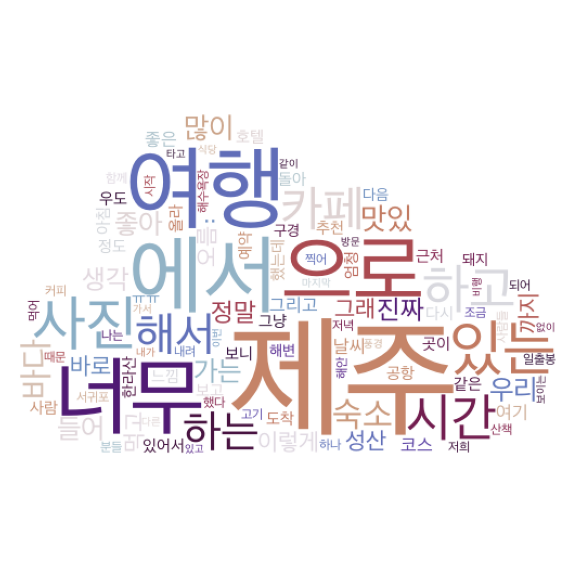

In [87]:
# 워드 클라우드
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

def make_wordcloud(text, topN):
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
    mask = np.array(Image.open("./data/cloud.png"))

    wordcloud = WordCloud(width = 1000, height = 1000, 
                          mask=mask,
                          background_color='white',
                          font_path = font_path, 
                          colormap="twilight",   
                          min_font_size = 10,
                          stopwords=SW
                          )

    cloud = wordcloud.generate_from_frequencies(dict(text.vocab().most_common(topN)))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.tight_layout()
    plt.show()
    
make_wordcloud(text, 100)

In [89]:
from pprint import pprint

pprint(text.vocab().most_common(100))

[('제주', 54664),
 ('여행', 20724),
 ('너무', 18398),
 ('에서', 18323),
 ('으로', 16600),
 ('있는', 16105),
 ('사진', 15801),
 ('하고', 13376),
 ('시간', 12359),
 ('카페', 10868),
 ('해서', 10181),
 ('하는', 9994),
 ('숙소', 9249),
 ('바다', 9126),
 ('맛있', 9049),
 ('많이', 8497),
 ('..', 8140),
 ('들어', 8020),
 ('우리', 7988),
 ('좋아', 7957),
 ('가는', 7766),
 ('진짜', 7403),
 ('생각', 7294),
 ('정말', 6985),
 ('이렇게', 6402),
 ('그래', 6188),
 ('바로', 6002),
 ('성산', 5986),
 ('까지', 5966),
 ('먹고', 5935),
 ('오름', 5834),
 ('그리고', 5738),
 ('코스', 5699),
 ('좋은', 5651),
 ('날씨', 5578),
 ('여기', 5439),
 ('있어서', 5426),
 ('도착', 5426),
 ('다시', 5370),
 ('호텔', 5232),
 ('한라산', 5231),
 ('사람', 5196),
 ('정도', 5162),
 ('공항', 5091),
 ('우도', 5002),
 ('같은', 4925),
 ('그냥', 4795),
 ('했는데', 4783),
 ('추천', 4738),
 ('보고', 4683),
 ('근처', 4676),
 ('ㅠㅠ', 4605),
 ('보니', 4498),
 ('곳이', 4491),
 ('돌아', 4309),
 ('올라', 4186),
 ('엄청', 4186),
 ('느낌', 4131),
 ('예약', 4013),
 ('아침', 3987),
 ('돼지', 3978),
 ('다음', 3891),
 ('해변', 3856),
 ('구경', 3846),
 ('일출봉', 3801),
 ('저녁', 